# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('05-x_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('05-x_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('05-y_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('05-y_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
90,0.215409,-9.348865,16.670317,0.065444,-0.013415,0.053069,26.594482,0.511910,20.186705,4.693410,...,18.192881,808.811157,1118.669678,-14.980642,1804.398438,885.325623,-20.047995,2839.987305,792.004211,-23.334564
531,0.085797,-16.513533,26.244503,0.049183,-0.013191,0.017293,26.614561,17.562231,11.433095,3.895259,...,20.207161,585.776611,1169.516602,-80.624176,1567.780762,918.880615,-89.359978,2664.712891,792.905823,-94.987045
492,0.563135,-7.162978,15.494725,0.144593,-0.006577,0.217526,10.974022,-18.723562,-10.943933,-24.795145,...,10.098401,866.738464,1100.495117,-21.313683,1836.603882,917.546326,-25.640020,2849.613037,692.944092,-28.145546
200,0.413840,-11.153063,22.222227,0.145823,-0.009489,0.214562,25.001774,-6.906032,-0.636149,-8.209146,...,14.959212,636.357361,1078.503418,-23.257929,1650.696655,797.134460,-33.546780,2619.937500,774.869690,-39.106663
402,0.328647,-13.787154,24.670168,0.032593,-0.011155,0.123292,30.038246,3.431727,16.535887,3.519480,...,21.928129,645.730103,1156.745850,-33.592209,1619.783081,1010.574829,-43.730709,2594.508057,838.815063,-49.116562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.145556,-14.881295,25.483837,0.064668,-0.020475,0.038528,33.007126,5.084921,7.073613,1.603030,...,18.878904,456.535004,1237.919922,-34.235203,1412.699097,955.805847,-43.698612,2439.599609,735.044373,-51.136097
9,0.586896,-9.136888,16.632467,0.052081,-0.018852,0.265093,20.435955,-4.069752,12.990916,-5.807331,...,11.841673,619.968567,1075.356812,-29.814981,1649.425415,678.257996,-38.348324,2710.641113,722.857422,-39.496727
359,0.863225,-6.990873,17.166529,0.099146,-0.003013,0.532472,11.550458,-25.511089,-9.151129,-25.327696,...,10.981806,768.142334,1088.997070,-17.285652,1760.218628,1018.889648,-23.720716,2737.804688,886.291992,-28.635784
192,0.231148,-10.927219,17.977736,0.070894,-0.019315,0.069673,24.386042,2.696081,11.380140,0.781675,...,14.637096,467.993958,1094.441650,-50.053112,1464.412109,784.086914,-59.347012,2402.289795,741.353394,-61.321152


# **SELECCION DE CARACTERISTICAS**

In [4]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [5]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [6]:
overs = RandomOverSampler()

In [7]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [8]:
y_t_overs

,Emociones
0,1
1,3
2,3
3,3
4,3
...,...
579,3
580,3
581,3
582,3


# **MODELO DE MARCHINE LEARNING**

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

clf.fit(x_t_overs, y_t_overs) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [10]:
#para generar 300 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0
for i in range(600):
  overs = RandomOverSampler()
  overs.fit(x_train, y_train)
  x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

  clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
  clf.fit(x_t_overs, y_t_overs)
  y_predict = clf.predict(x_test)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

 prueba :0 PRECISION ====  0.5121951219512195 
 prueba :1 PRECISION ====  0.5203252032520326 
 prueba :2 PRECISION ====  0.5691056910569106 
 prueba :3 PRECISION ====  0.6341463414634146 
 prueba :4 PRECISION ====  0.6097560975609756 
 prueba :5 PRECISION ====  0.5609756097560976 
 prueba :6 PRECISION ====  0.6341463414634146 
 prueba :7 PRECISION ====  0.5284552845528455 
 prueba :8 PRECISION ====  0.5691056910569106 
 prueba :9 PRECISION ====  0.5691056910569106 
 prueba :10 PRECISION ====  0.5934959349593496 
 prueba :11 PRECISION ====  0.6016260162601627 
 prueba :12 PRECISION ====  0.5772357723577236 
 prueba :13 PRECISION ====  0.5447154471544715 
 prueba :14 PRECISION ====  0.5772357723577236 
 prueba :15 PRECISION ====  0.6097560975609756 
 prueba :16 PRECISION ====  0.6504065040650406 
 prueba :17 PRECISION ====  0.5040650406504065 
 prueba :18 PRECISION ====  0.5203252032520326 
 prueba :19 PRECISION ====  0.6260162601626016 
 prueba :20 PRECISION ====  0.5691056910569106 
 p

In [11]:
y_predict = clf.predict(x_test)
y_predict

array([2, 0, 0, 0, 2, 3, 0, 3, 1, 1, 1, 3, 0, 3, 1, 2, 3, 0, 0, 0, 2, 3,
       2, 3, 3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 3, 0, 2, 0, 1, 0, 0,
       0, 3, 1, 0, 2, 1, 3, 0, 0, 1, 1, 0, 1, 2, 0, 3, 0, 1, 1, 3, 1, 0,
       1, 1, 0, 2, 0, 2, 0, 1, 3, 0, 3, 0, 3, 3, 3, 1, 2, 2, 1, 3, 1, 3,
       0, 0, 3, 3, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 3, 1, 3, 3, 3, 0, 2, 2,
       0, 0, 1, 3, 1, 1, 1, 0, 0, 3, 0, 3, 1])

# **EVALUACION**

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.55      0.60      0.57        30
           2       0.42      0.73      0.53        11
           3       0.83      0.56      0.67        43

    accuracy                           0.67       123
   macro avg       0.64      0.68      0.65       123
weighted avg       0.71      0.67      0.68       123



In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.55      0.60      0.57        30
           2       0.42      0.73      0.53        11
           3       0.83      0.56      0.67        43

    accuracy                           0.67       123
   macro avg       0.64      0.68      0.65       123
weighted avg       0.71      0.67      0.68       123

Matriz de confusión, sin normalización
[[33  5  1  0]
 [ 7 18  1  4]
 [ 1  1  8  1]
 [ 1  9  9 24]]


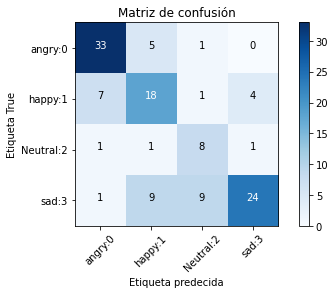

In [17]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')